Well this idea went pretty much nowhere

The model simply learned to generate a black image, as it was the closest way of getting the right results
It explains why all the accuracies tested generated approx the same avg.

In [1]:
import os
from lib.train_AI_lib import *
from lib.models.SemiSup import *
from lib.models.AutoEncoders import *

In [2]:
os.chdir('..')
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


## Using auto encoder to semi-supervise

In [ ]:
batchsize=16; epoch=15; lr=0.01
enc = autEncE('autEncE'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te15_lr0.001/model_epoch14'))

net = semiSupB(name='semiSupB', enc=enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

## Using auto encoder generatively (prob distribution)

In [ ]:
batchsize=16; epoch=15; lr=0.005
enc = autEncC('autEncC'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncC_b64_te15_lr0.001/model_epoch14'))

net = genSemiA(name='genSemiA_encC', enc=enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

In [ ]:
batchsize=16; epoch=15; lr=0.005
enc = autEncD('autEncD'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncD_b64_te15_lr0.001/model_epoch14'))

net = genSemiA(name='genSemiA_encD', enc=enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

In [ ]:
batchsize=16; epoch=15; lr=0.005
enc = autEncE('autEncE'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te15_lr0.001/model_epoch14'))

net = genSemiA(name='genSemiA_encD', enc=enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

## Using the auto encoder generatively (full)
Since the above attempt at an autoencoder feeds in what is essentially a prob distribution into the CNN, attempting a different approach wherein i use the prediction to generate a mask to apply to the original images

In [ ]:
### Generate the images to use (commented out unless required)

In [ ]:
enc = autEncC('autEncC'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncC_b64_te15_lr0.001/model_epoch14'))
genMaskedImg(enc)

In [ ]:
enc = autEncD('autEncD'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncD_b64_te15_lr0.001/model_epoch14'))
genMaskedImg(enc)

In [ ]:
enc = autEncE('autEncE'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te15_lr0.001/model_epoch14'))
genMaskedImg(enc)

In [ ]:
batchsize=16; epoch=15; lr=0.001
net = fullGenSemiA(name='fullGenSemiA_encC'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize, inPath="saved/autEncMasked/autEncC")
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

In [ ]:
batchsize=16; epoch=15; lr=0.001
net = fullGenSemiA(name='fullGenSemiA_encD'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize, inPath="saved/autEncMasked/autEncD")
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

All three models except encoder E showed promise, All with finial training errors below the baseline. Am begining to wonder, if the lables we have are 'categorized' into the discrete numbers of bounding boxes,
can we round the output of the network then use the rounded output as the input into the loss function? Could the loss function then stay MSE, or could it work as Cross Entropy (most likely a classification function without functions like softmax, but still)

Its also noted that the training loops are highly erratic, at once going down to 16, but then going to as high as 20. it's odd.

Note 2: turns out the erratic behavour observed above was due to my evalutaion code, recoded evalutaion doedsn't produce such erratic outputs
Retraining all networks to see which one works the best

Note 3: didn't change signficantly. To gain further understanding as to the distribution of error, creating code to analyze data.

Discretising the prediction into the loss function had no effect, further research will need to be conducted if there are loss fucntions fit for this task
For now, the definition of the normal regression adam trainer will be trained to give this definition of accuracy, as it's a different metric than loss.

## Analysis of data

Tested 99.93%Tested 99.96%

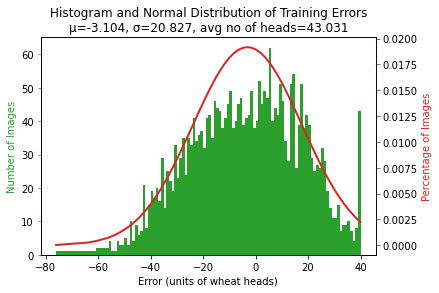

In [6]:
net = fullGenSemiA(name='fullGenSemiA_encC'); net.cuda()  # creating neural net object
netPath = 'saved/TrainingRuns/RegAdamTrainer/fullGenSemiA_encC_b16_te15_lr0.005' # Path to the training folder, this will also be the path that the analysis outputs to
net.load_state_dict(torch.load(netPath+'/model_epoch14'))  # Loading pre-trained model to net object
trainLoader, valLoder, testLoader = loadData(1)  # defining loaders (note batchsize must be 1)
_ = regresAnalysis(net, trainLoader, netPath)  # running analysis

Tested 99.96%

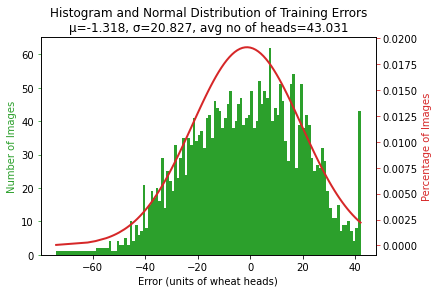

In [7]:
net = fullGenSemiA(name='fullGenSemiA_encD'); net.cuda()
netPath = 'saved/TrainingRuns/RegAdamTrainer/fullGenSemiA_encD_b16_te15_lr0.005'
net.load_state_dict(torch.load(netPath+'/model_epoch14'))
trainLoader, valLoder, testLoader = loadData(1)
_ = regresAnalysis(net, trainLoader, netPath)